In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('dataset.csv')

In [3]:
df.head(5)

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [4]:
df.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [6]:
df.dtypes

Date     object
Temp    float64
dtype: object

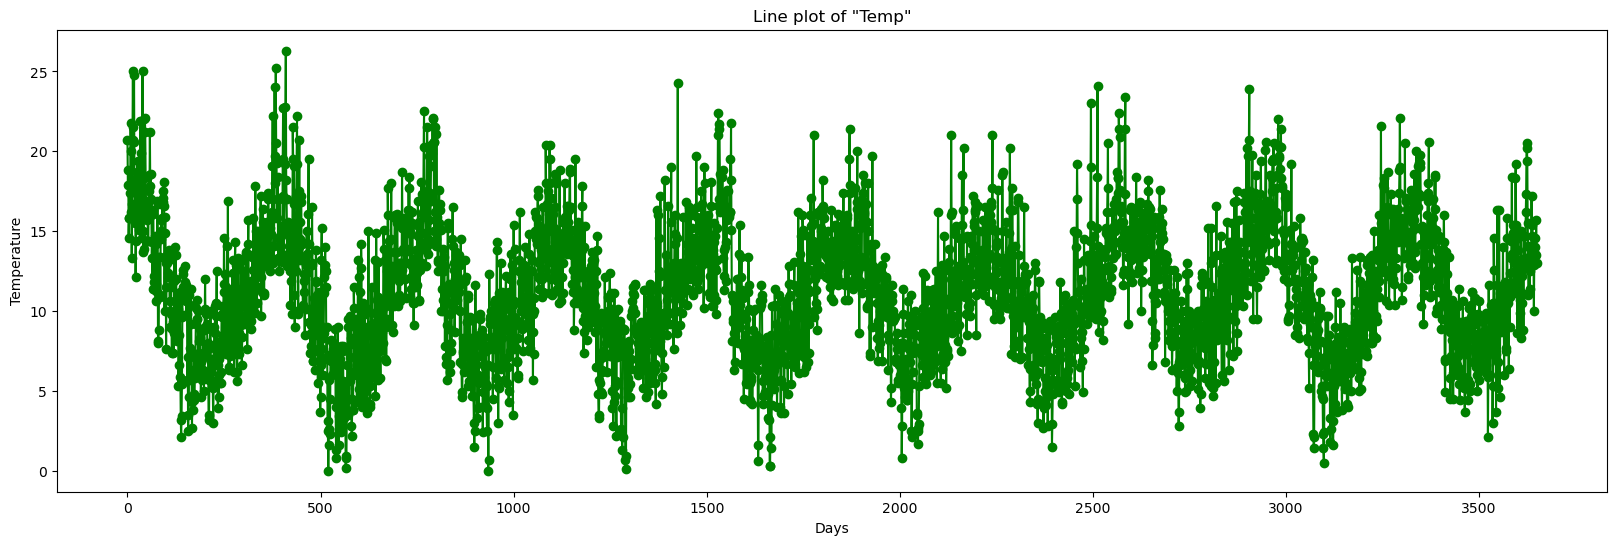

In [9]:
plt.figure(figsize=(20,6))
plt.plot(df['Temp'], color = 'green', marker = 'o')
plt.title('Line plot of "Temp"')
plt.xlabel('Days')
plt.ylabel('Temperature')

plt.show()

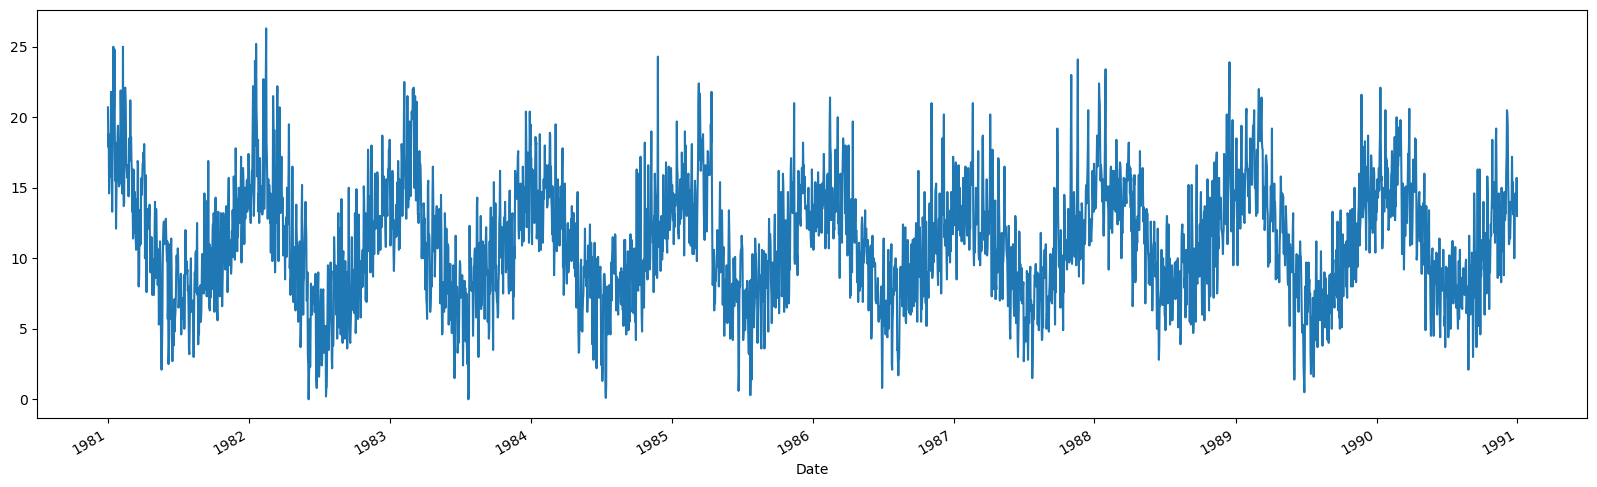

In [40]:
from pandas import read_csv

series = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True).squeeze()
plt.figure(figsize=(20,6))
series.plot()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13340\845756066.py:6: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  groups = series.groupby(Grouper(freq='A'))


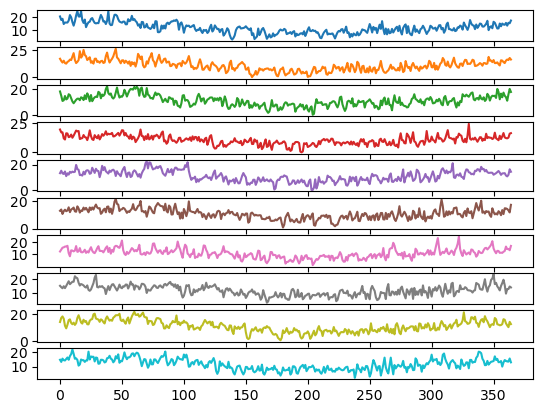

In [26]:
import pandas as pd
from pandas import Grouper
from matplotlib import pyplot as plt

series = pd.read_csv('dataset.csv', header=0, index_col=0, parse_dates=True).squeeze()
groups = series.groupby(Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.plot(subplots=True, legend=False)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13340\3808490757.py:5: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  series.groupby(pd.Grouper(freq='A')).sum().plot(figsize=(20, 6))


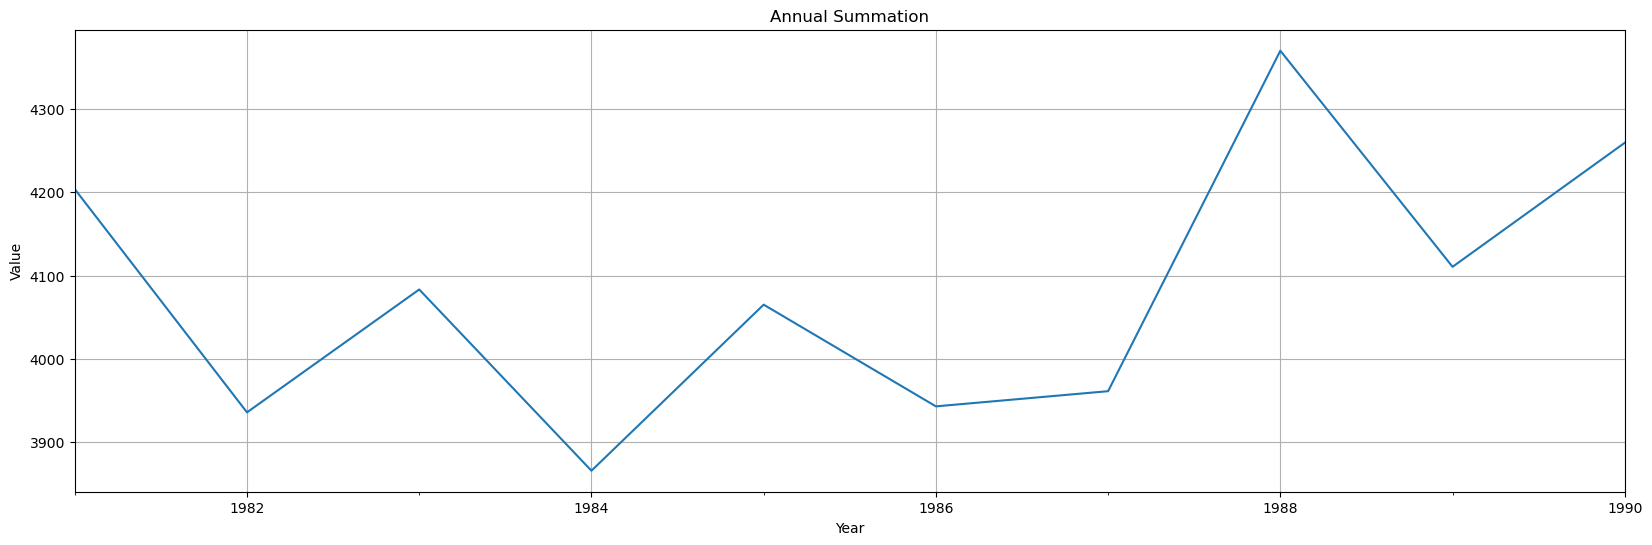

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

series = pd.read_csv('dataset.csv', header=0, index_col=0, parse_dates=True).squeeze()
series.groupby(pd.Grouper(freq='A')).sum().plot(figsize=(20, 6))
plt.title('Annual Summation'); plt.xlabel('Year'); plt.ylabel('Value'); plt.grid()
plt.show()

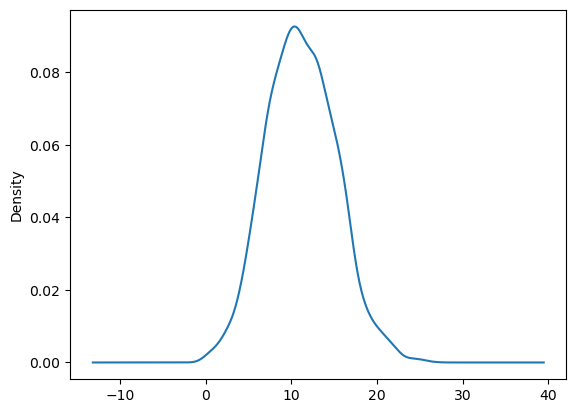

In [31]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True).squeeze()
series.plot(kind='kde')
pyplot.show()

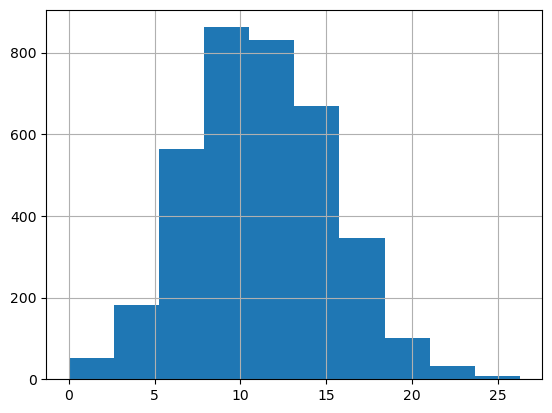

In [29]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True).squeeze()
series.hist()
pyplot.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13340\3564327004.py:6: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  groups = series.groupby(Grouper(freq='A'))


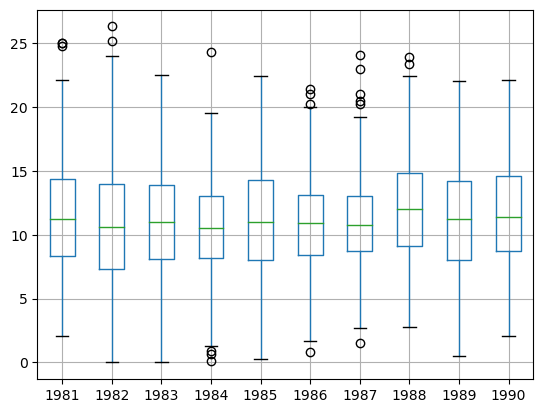

In [41]:
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
series = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True).squeeze()
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()
pyplot.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13340\3965176182.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  groups = one_year.groupby(Grouper(freq='M'))


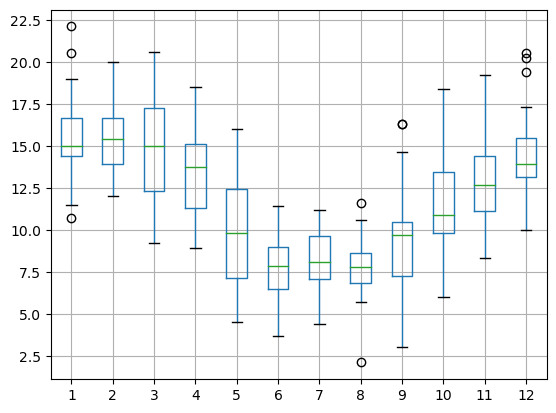

In [34]:
# create a boxplot of monthly data
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
from pandas import concat

one_year = series['1990']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
months.boxplot()
pyplot.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13340\3236226012.py:6: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  groups = series.groupby(Grouper(freq='A'))


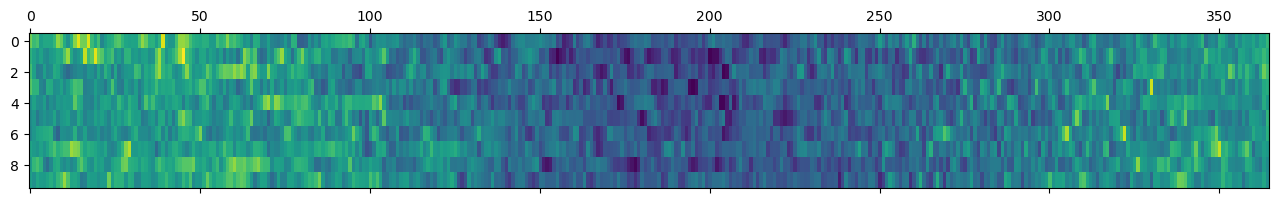

In [35]:
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot

groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years = years.T
pyplot.matshow(years, interpolation=None, aspect='auto')
pyplot.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13340\408894335.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  groups = one_year.groupby(Grouper(freq='M'))


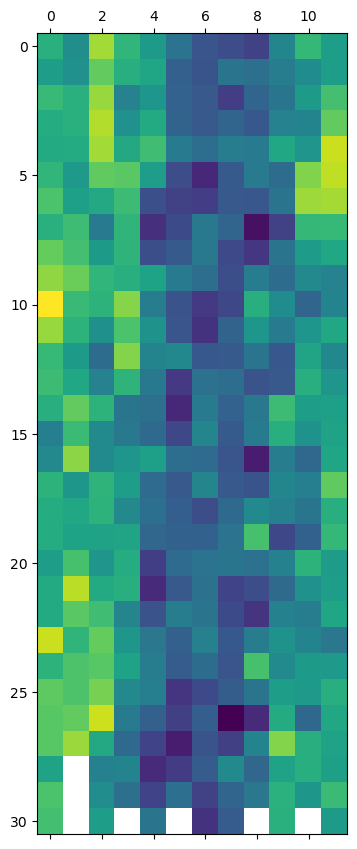

In [36]:
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
from pandas import concat

one_year = series['1990']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
pyplot.matshow(months, interpolation=None, aspect='auto')
pyplot.show()

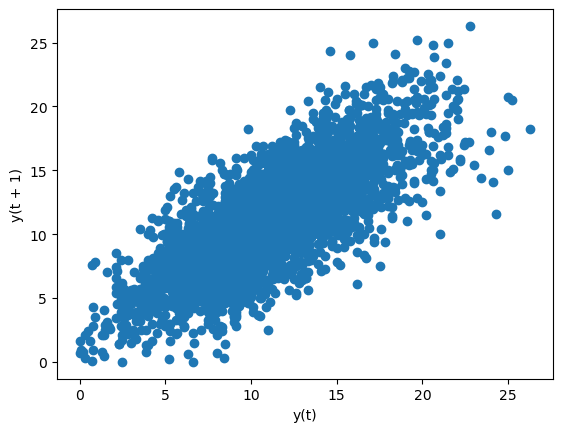

In [37]:
# create a scatter plot
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(series)
pyplot.show()

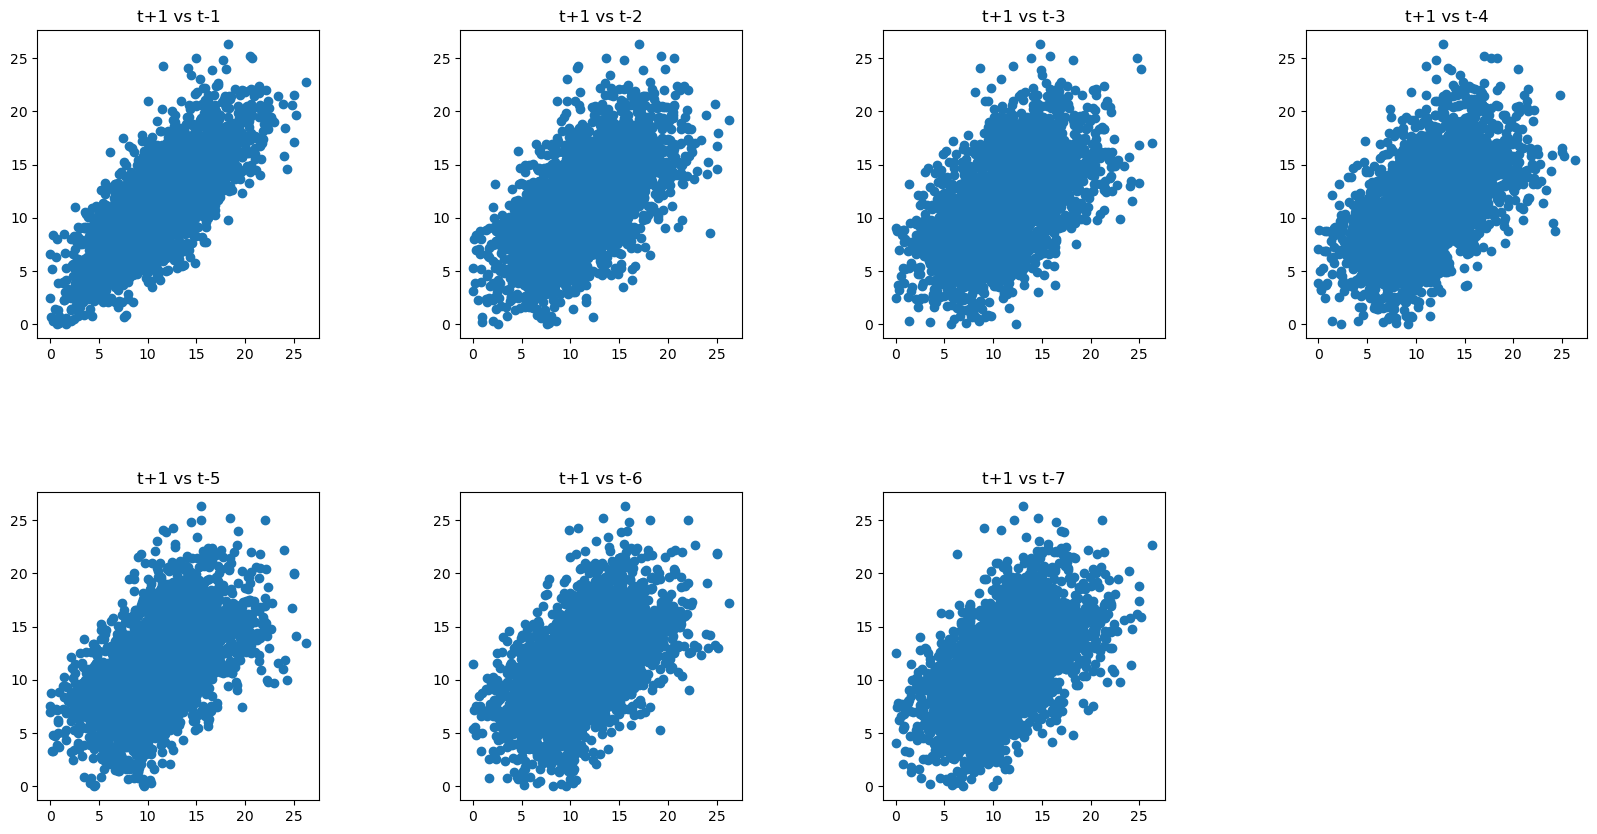

In [43]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from pandas.plotting import scatter_matrix

values = DataFrame(series.values)
lags = 7
columns = [values]
for i in range(1, (lags + 1)):
    columns.append(values.shift(i))

dataframe = concat(columns, axis=1)
columns = ['t+1']
for i in range(1, (lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns

pyplot.figure(figsize=(20, 10))  
pyplot.subplots_adjust(wspace=0.5, hspace=0.5) 
for i in range(1, (lags + 1)):
    ax = pyplot.subplot(240 + i)
    ax.set_title('t+1 vs t-' + str(i))
    pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-' + str(i)].values)

pyplot.show()

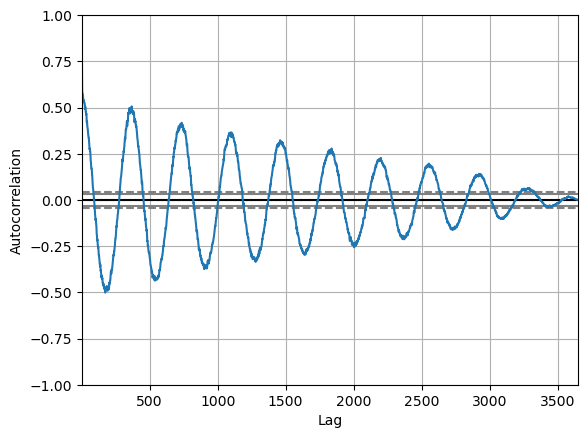

In [39]:
# create an autocorrelation plot
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()